In [ ]:
# 숫자별로 모델링 따로 받기

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import *
from keras.layers import *
from keras.datasets import mnist
import os

In [ ]:
OUT_DIR = './CNN_out'
img_shape = (28, 28, 1)
epochs = 100000
batch_size = 128
noise = 100
sample_interval = 100

In [ ]:
(x_train, y_train), (_, _) = mnist.load_data()
print(x_train.shape)
MY_NUMBER = 7   # 여기 숫자만 다르게 해서 숫자 모델링 따로 받을 수 있음 
x_train = x_train[y_train == MY_NUMBER] # 인덱싱하려고 슬라이싱 해서 마이넘버 받아줌
x_train = x_train / 127.5 - 1
x_train = np.expand_dims(x_train, axis=3)
print(x_train.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(6265, 28, 28, 1)


In [ ]:
generator = Sequential()
generator.add(Dense(256*7*7, input_dim=noise))
generator.add(Reshape((7, 7, 256)))
generator.add(Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'))
generator.add(BatchNormalization())
generator.add(LeakyReLU(alpha=0.01))
generator.add(Conv2DTranspose(64, kernel_size=3, strides=1, padding='same'))
generator.add(BatchNormalization())
generator.add(LeakyReLU(alpha=0.01))
generator.add(Conv2DTranspose(1, kernel_size=3, strides=2, padding='same'))
generator.add(Activation('tanh'))
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1266944   
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      295040    
 nspose)                                                         
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 128)      512       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 14, 14, 64)       7

In [ ]:
discriminator = Sequential()
discriminator.add(Conv2D(32, kernel_size=3, strides=2, padding='same', input_shape=img_shape))
discriminator.add(LeakyReLU(alpha=0.01))
discriminator.add(Conv2D(64, kernel_size=3, strides=2, padding='same'))
discriminator.add(LeakyReLU(alpha=0.01))
discriminator.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))
discriminator.add(LeakyReLU(alpha=0.01))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 4, 4, 128)         0         
                                                                 
 flatten (Flatten)           (None, 2048)             

In [ ]:
discriminator.compile(loss='binary_crossentropy', optimizer='adam',
                      metrics=['accuracy'])
discriminator.trainable = False

gan_model =Sequential()
gan_model.add(generator)
gan_model.add(discriminator)
gan_model.summary()
gan_model.compile(loss='binary_crossentropy', optimizer='adam')

real = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 1)         1637121   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 94721     
                                                                 
Total params: 1,731,842
Trainable params: 1,636,737
Non-trainable params: 95,105
_________________________________________________________________


4/4 [==============================] - 8s 4ms/step
0, [D loss: 0.697609, acc.: 0.70%], [G loss: 0.613280]
1/1 [==============================] - 0s 160ms/step


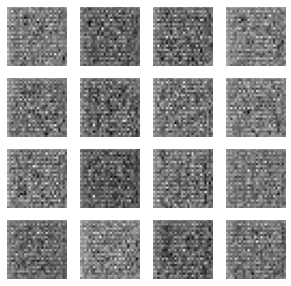

4/4 [==============================] - 0s 4ms/step
100, [D loss: 0.000019, acc.: 0.00%], [G loss: 0.003223]
1/1 [==============================] - 0s 18ms/step


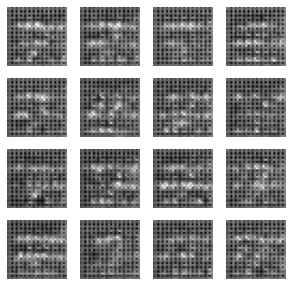

4/4 [==============================] - 0s 4ms/step
200, [D loss: 0.000020, acc.: 0.00%], [G loss: 0.000325]
1/1 [==============================] - 0s 15ms/step


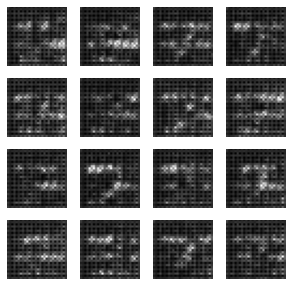

4/4 [==============================] - 0s 4ms/step
300, [D loss: 0.061331, acc.: 0.06%], [G loss: 0.769530]
1/1 [==============================] - 0s 16ms/step


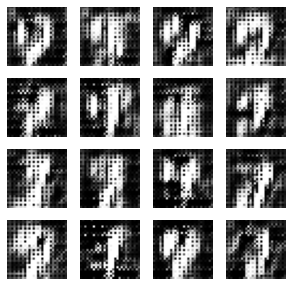

4/4 [==============================] - 0s 6ms/step
400, [D loss: 0.236155, acc.: 0.24%], [G loss: 0.859233]
1/1 [==============================] - 0s 16ms/step


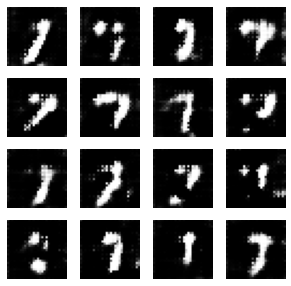

4/4 [==============================] - 0s 5ms/step
500, [D loss: 0.350854, acc.: 0.35%], [G loss: 3.009656]
1/1 [==============================] - 0s 14ms/step


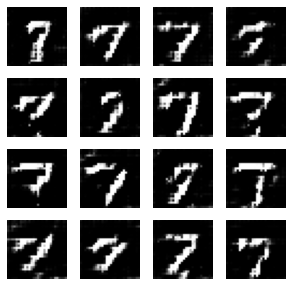

4/4 [==============================] - 0s 3ms/step
600, [D loss: 0.484151, acc.: 0.48%], [G loss: 2.254248]
1/1 [==============================] - 0s 17ms/step


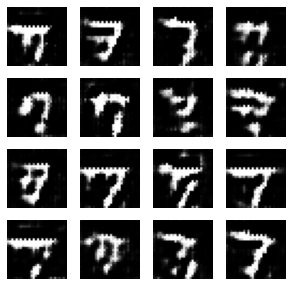

4/4 [==============================] - 0s 5ms/step
700, [D loss: 0.467600, acc.: 0.47%], [G loss: 1.467308]
1/1 [==============================] - 0s 15ms/step


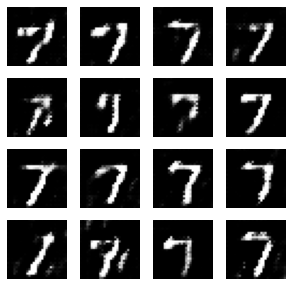

4/4 [==============================] - 0s 4ms/step
800, [D loss: 0.286155, acc.: 0.29%], [G loss: 2.666627]
1/1 [==============================] - 0s 17ms/step


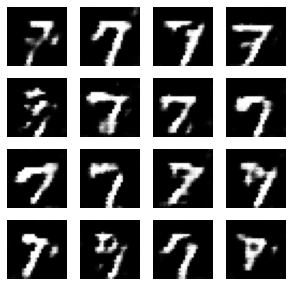

4/4 [==============================] - 0s 4ms/step
900, [D loss: 0.490100, acc.: 0.49%], [G loss: 1.483622]
1/1 [==============================] - 0s 19ms/step


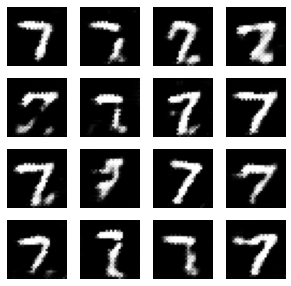

4/4 [==============================] - 0s 4ms/step
1000, [D loss: 0.301472, acc.: 0.30%], [G loss: 2.231338]
1/1 [==============================] - 0s 16ms/step


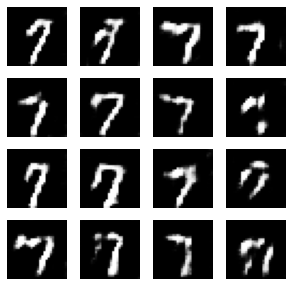

4/4 [==============================] - 0s 5ms/step
1100, [D loss: 0.466101, acc.: 0.47%], [G loss: 1.660492]
1/1 [==============================] - 0s 14ms/step


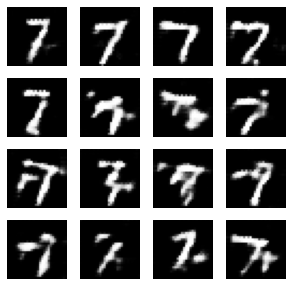

4/4 [==============================] - 0s 5ms/step
1200, [D loss: 0.433358, acc.: 0.43%], [G loss: 1.729506]
1/1 [==============================] - 0s 18ms/step


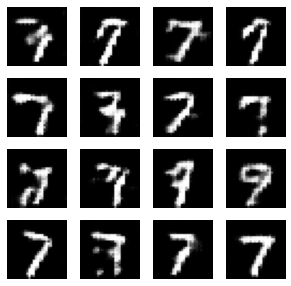

4/4 [==============================] - 0s 6ms/step
1300, [D loss: 0.240328, acc.: 0.24%], [G loss: 2.178162]
1/1 [==============================] - 0s 14ms/step


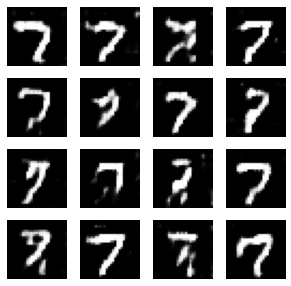

4/4 [==============================] - 0s 6ms/step
1400, [D loss: 0.203451, acc.: 0.20%], [G loss: 3.041928]
1/1 [==============================] - 0s 23ms/step


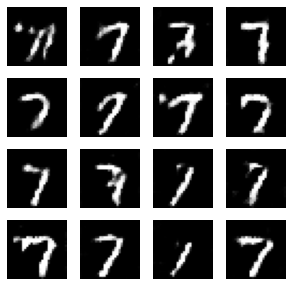

4/4 [==============================] - 0s 5ms/step
1500, [D loss: 0.258072, acc.: 0.26%], [G loss: 2.703053]
1/1 [==============================] - 0s 15ms/step


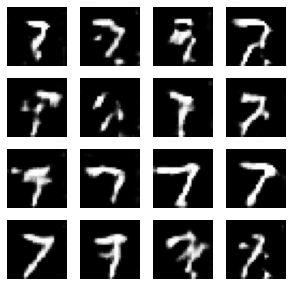

4/4 [==============================] - 0s 5ms/step
1600, [D loss: 0.395226, acc.: 0.40%], [G loss: 1.910437]
1/1 [==============================] - 0s 15ms/step


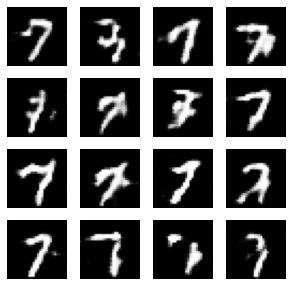

4/4 [==============================] - 0s 4ms/step
1700, [D loss: 0.377242, acc.: 0.38%], [G loss: 1.867095]
1/1 [==============================] - 0s 14ms/step


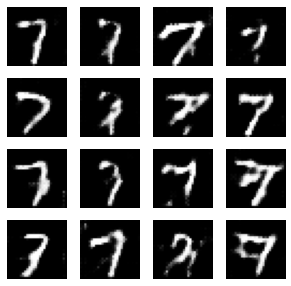

4/4 [==============================] - 0s 4ms/step
1800, [D loss: 0.259323, acc.: 0.26%], [G loss: 2.207010]
1/1 [==============================] - 0s 17ms/step


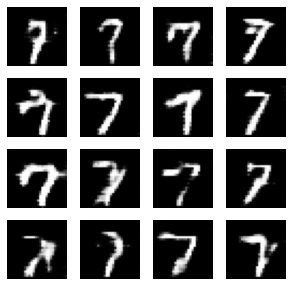

4/4 [==============================] - 0s 6ms/step
1900, [D loss: 0.260143, acc.: 0.26%], [G loss: 2.307539]
1/1 [==============================] - 0s 15ms/step


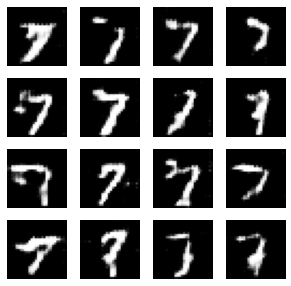

4/4 [==============================] - 0s 5ms/step
2000, [D loss: 0.266643, acc.: 0.27%], [G loss: 2.583284]
1/1 [==============================] - 0s 15ms/step


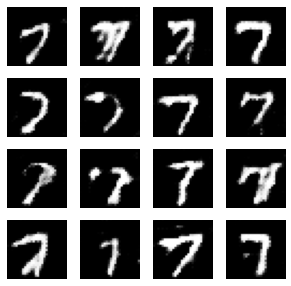

4/4 [==============================] - 0s 5ms/step
2100, [D loss: 0.141100, acc.: 0.14%], [G loss: 3.030924]
1/1 [==============================] - 0s 32ms/step


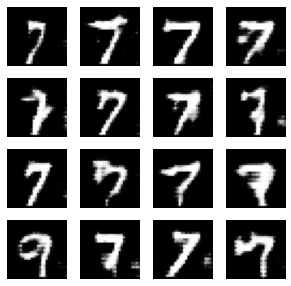

4/4 [==============================] - 0s 6ms/step
2200, [D loss: 0.417015, acc.: 0.42%], [G loss: 2.367601]
1/1 [==============================] - 0s 21ms/step


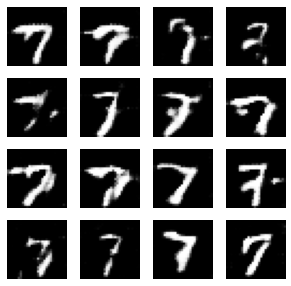

4/4 [==============================] - 0s 3ms/step
2300, [D loss: 0.598624, acc.: 0.60%], [G loss: 1.497019]
1/1 [==============================] - 0s 17ms/step


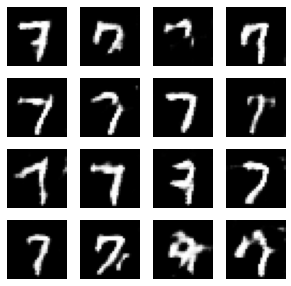

4/4 [==============================] - 0s 6ms/step
2400, [D loss: 0.344329, acc.: 0.34%], [G loss: 2.685445]
1/1 [==============================] - 0s 18ms/step


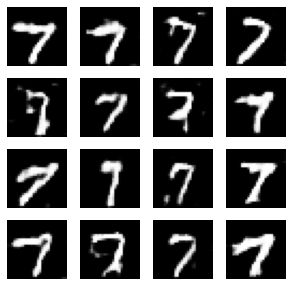

4/4 [==============================] - 0s 6ms/step
2500, [D loss: 0.247654, acc.: 0.25%], [G loss: 2.188609]
1/1 [==============================] - 0s 19ms/step


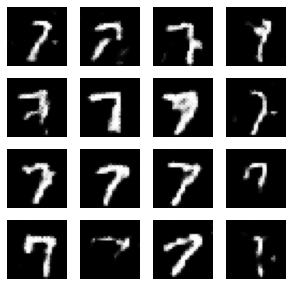

4/4 [==============================] - 0s 7ms/step
2600, [D loss: 0.372617, acc.: 0.37%], [G loss: 2.091949]
1/1 [==============================] - 0s 15ms/step


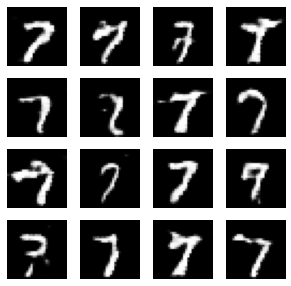

4/4 [==============================] - 0s 5ms/step
2700, [D loss: 0.417928, acc.: 0.42%], [G loss: 2.140328]
1/1 [==============================] - 0s 19ms/step


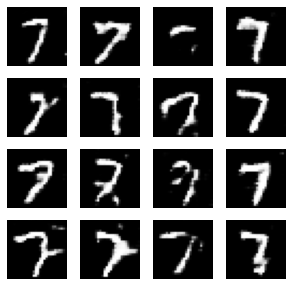

4/4 [==============================] - 0s 8ms/step
2800, [D loss: 0.331814, acc.: 0.33%], [G loss: 1.998560]
1/1 [==============================] - 0s 25ms/step


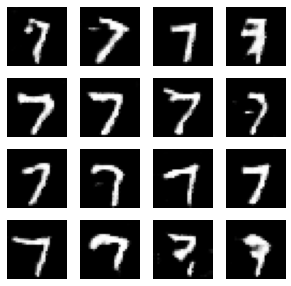

4/4 [==============================] - 0s 7ms/step
2900, [D loss: 0.256909, acc.: 0.26%], [G loss: 2.410519]
1/1 [==============================] - 0s 23ms/step


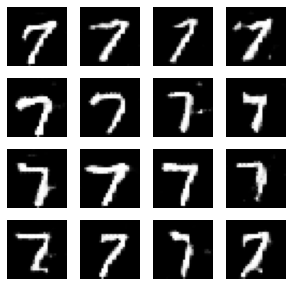

4/4 [==============================] - 0s 7ms/step
3000, [D loss: 0.535099, acc.: 0.54%], [G loss: 1.826462]
1/1 [==============================] - 0s 21ms/step


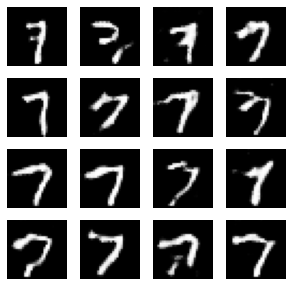

4/4 [==============================] - 0s 4ms/step
3100, [D loss: 0.421207, acc.: 0.42%], [G loss: 2.113464]
1/1 [==============================] - 0s 22ms/step


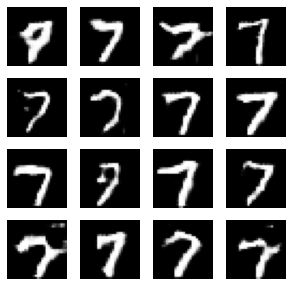

4/4 [==============================] - 0s 4ms/step
3200, [D loss: 0.263349, acc.: 0.26%], [G loss: 2.408910]
1/1 [==============================] - 0s 17ms/step


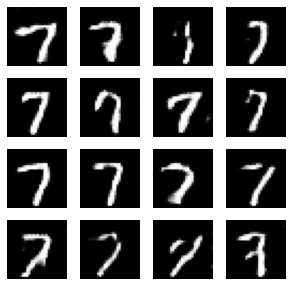

4/4 [==============================] - 0s 4ms/step
3300, [D loss: 0.493168, acc.: 0.49%], [G loss: 1.880353]
1/1 [==============================] - 0s 18ms/step


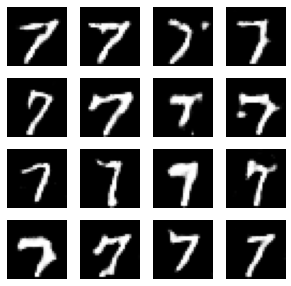

4/4 [==============================] - 0s 6ms/step
3400, [D loss: 0.344109, acc.: 0.34%], [G loss: 2.192600]
1/1 [==============================] - 0s 17ms/step


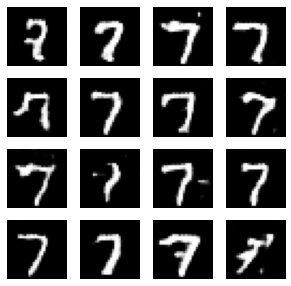

4/4 [==============================] - 0s 7ms/step
3500, [D loss: 0.428234, acc.: 0.43%], [G loss: 1.826684]
1/1 [==============================] - 0s 28ms/step


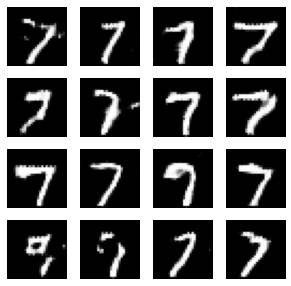

4/4 [==============================] - 0s 5ms/step
3600, [D loss: 0.566737, acc.: 0.57%], [G loss: 2.158805]
1/1 [==============================] - 0s 23ms/step


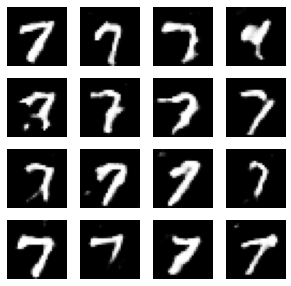

4/4 [==============================] - 0s 6ms/step
3700, [D loss: 0.219621, acc.: 0.22%], [G loss: 2.417818]
1/1 [==============================] - 0s 18ms/step


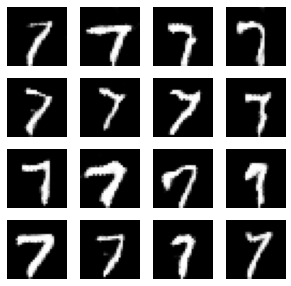

4/4 [==============================] - 0s 10ms/step
3800, [D loss: 0.686739, acc.: 0.69%], [G loss: 1.584780]
1/1 [==============================] - 0s 29ms/step


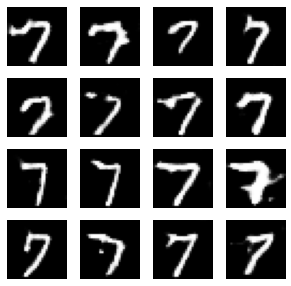

4/4 [==============================] - 0s 6ms/step
3900, [D loss: 0.206423, acc.: 0.21%], [G loss: 2.537342]
1/1 [==============================] - 0s 24ms/step


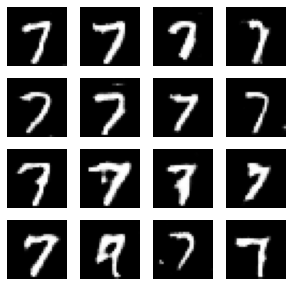

4/4 [==============================] - 0s 4ms/step
4000, [D loss: 0.279930, acc.: 0.28%], [G loss: 2.049517]
1/1 [==============================] - 0s 21ms/step


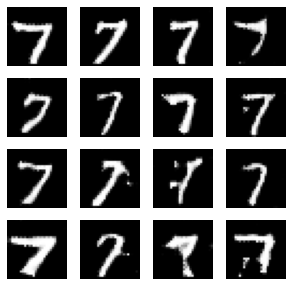

4/4 [==============================] - 0s 6ms/step
4100, [D loss: 0.394662, acc.: 0.39%], [G loss: 2.562997]
1/1 [==============================] - 0s 30ms/step


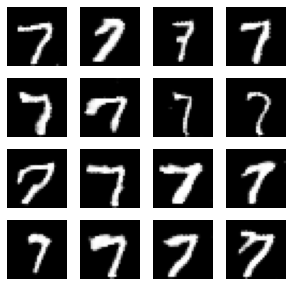

4/4 [==============================] - 0s 5ms/step
4200, [D loss: 0.348168, acc.: 0.35%], [G loss: 2.257705]
1/1 [==============================] - 0s 23ms/step


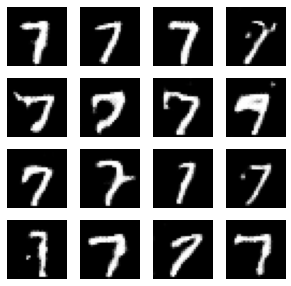

4/4 [==============================] - 0s 4ms/step
4300, [D loss: 0.351179, acc.: 0.35%], [G loss: 2.298839]
1/1 [==============================] - 0s 15ms/step


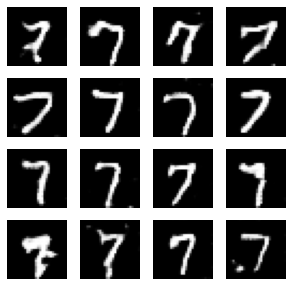

4/4 [==============================] - 0s 5ms/step
4400, [D loss: 0.502050, acc.: 0.50%], [G loss: 1.748875]
1/1 [==============================] - 0s 17ms/step


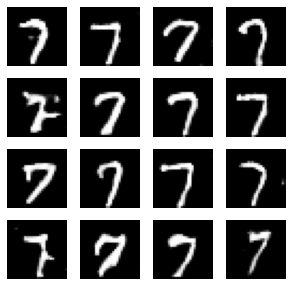

4/4 [==============================] - 0s 6ms/step
4500, [D loss: 0.327750, acc.: 0.33%], [G loss: 2.109046]
1/1 [==============================] - 0s 19ms/step


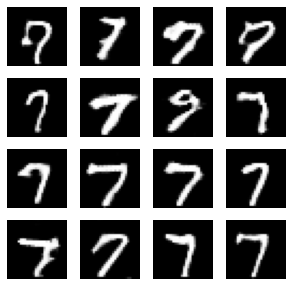

4/4 [==============================] - 0s 5ms/step
4600, [D loss: 0.377554, acc.: 0.38%], [G loss: 2.233391]
1/1 [==============================] - 0s 15ms/step


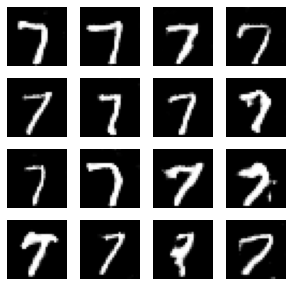

4/4 [==============================] - 0s 4ms/step
4700, [D loss: 0.466516, acc.: 0.47%], [G loss: 2.164998]
1/1 [==============================] - 0s 24ms/step


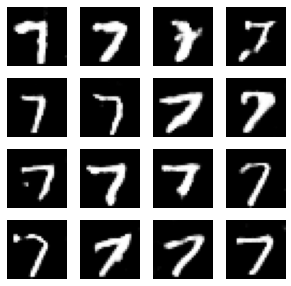

4/4 [==============================] - 0s 5ms/step
4800, [D loss: 0.444179, acc.: 0.44%], [G loss: 1.753338]
1/1 [==============================] - 0s 36ms/step


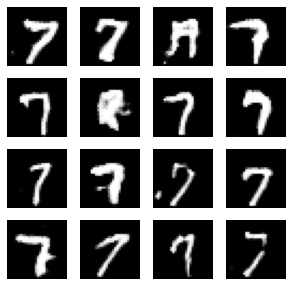

4/4 [==============================] - 0s 4ms/step
4900, [D loss: 0.439965, acc.: 0.44%], [G loss: 2.069514]
1/1 [==============================] - 0s 23ms/step


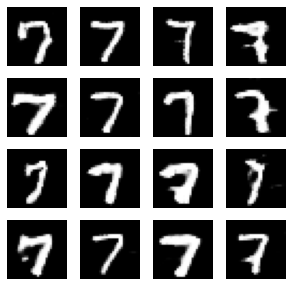

4/4 [==============================] - 0s 6ms/step
5000, [D loss: 0.393754, acc.: 0.39%], [G loss: 2.114284]
1/1 [==============================] - 0s 22ms/step


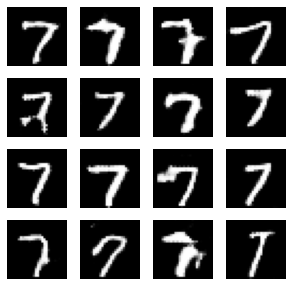

4/4 [==============================] - 0s 5ms/step
5100, [D loss: 0.406053, acc.: 0.41%], [G loss: 2.253255]
1/1 [==============================] - 0s 20ms/step


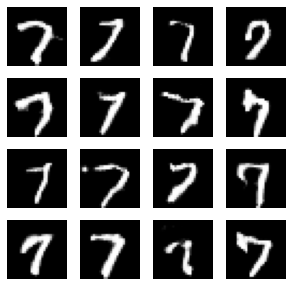

4/4 [==============================] - 0s 6ms/step
5200, [D loss: 0.431353, acc.: 0.43%], [G loss: 2.273494]
1/1 [==============================] - 0s 17ms/step


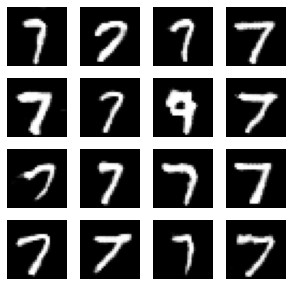

4/4 [==============================] - 0s 6ms/step
5300, [D loss: 0.343666, acc.: 0.34%], [G loss: 2.405825]
1/1 [==============================] - 0s 16ms/step


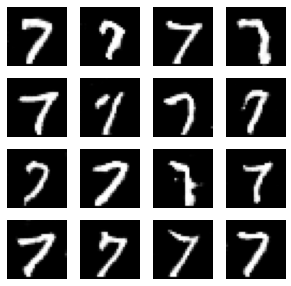

4/4 [==============================] - 0s 5ms/step
5400, [D loss: 0.330736, acc.: 0.33%], [G loss: 2.094174]
1/1 [==============================] - 0s 23ms/step


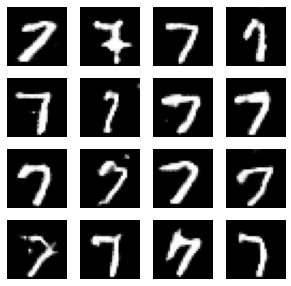

4/4 [==============================] - 0s 6ms/step
5500, [D loss: 0.284323, acc.: 0.28%], [G loss: 2.671637]
1/1 [==============================] - 0s 15ms/step


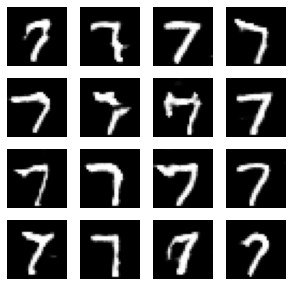

4/4 [==============================] - 0s 4ms/step
5600, [D loss: 0.397146, acc.: 0.40%], [G loss: 2.177719]
1/1 [==============================] - 0s 33ms/step


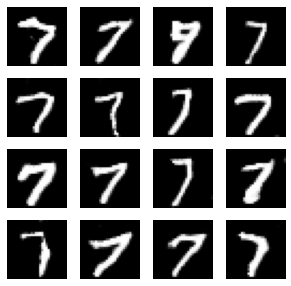

4/4 [==============================] - 0s 5ms/step
5700, [D loss: 0.590752, acc.: 0.59%], [G loss: 1.487996]
1/1 [==============================] - 0s 27ms/step


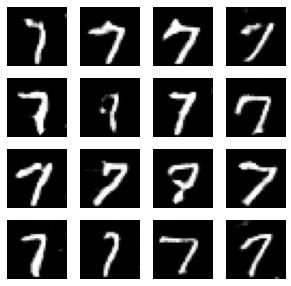

4/4 [==============================] - 0s 4ms/step
5800, [D loss: 0.436943, acc.: 0.44%], [G loss: 1.955744]
1/1 [==============================] - 0s 27ms/step


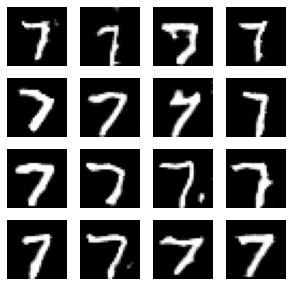

4/4 [==============================] - 0s 5ms/step
5900, [D loss: 0.339544, acc.: 0.34%], [G loss: 2.101107]
1/1 [==============================] - 0s 28ms/step


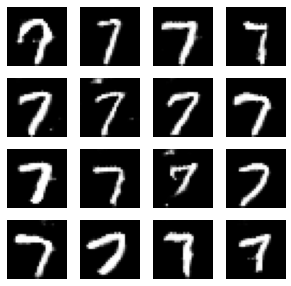

4/4 [==============================] - 0s 5ms/step
6000, [D loss: 0.416441, acc.: 0.42%], [G loss: 1.793534]
1/1 [==============================] - 0s 22ms/step


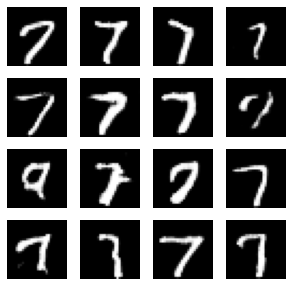

4/4 [==============================] - 0s 4ms/step
6100, [D loss: 0.307977, acc.: 0.31%], [G loss: 2.145980]
1/1 [==============================] - 0s 16ms/step


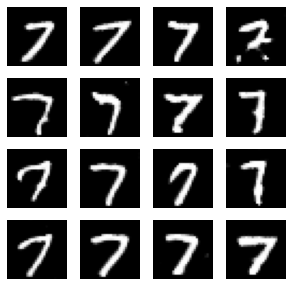

4/4 [==============================] - 0s 4ms/step
6200, [D loss: 0.453789, acc.: 0.45%], [G loss: 1.394564]
1/1 [==============================] - 0s 22ms/step


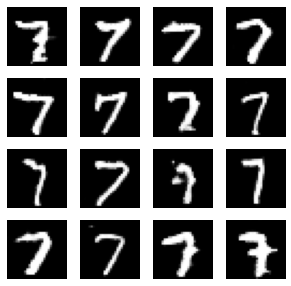

4/4 [==============================] - 0s 3ms/step
6300, [D loss: 0.420662, acc.: 0.42%], [G loss: 2.118044]
1/1 [==============================] - 0s 26ms/step


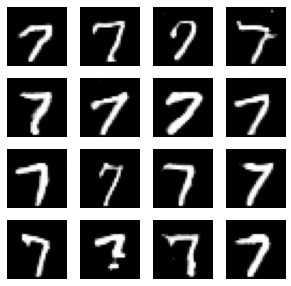

4/4 [==============================] - 0s 4ms/step
6400, [D loss: 0.428052, acc.: 0.43%], [G loss: 2.134840]
1/1 [==============================] - 0s 22ms/step


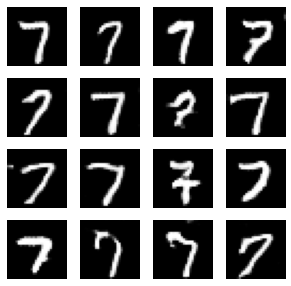

4/4 [==============================] - 0s 6ms/step
6500, [D loss: 0.305735, acc.: 0.31%], [G loss: 2.190563]
1/1 [==============================] - 0s 17ms/step


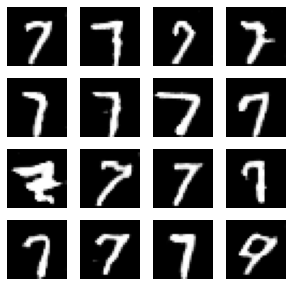

4/4 [==============================] - 0s 5ms/step
6600, [D loss: 0.412051, acc.: 0.41%], [G loss: 1.841026]
1/1 [==============================] - 0s 27ms/step


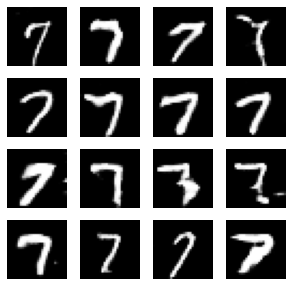

4/4 [==============================] - 0s 3ms/step
6700, [D loss: 0.326943, acc.: 0.33%], [G loss: 2.254173]
1/1 [==============================] - 0s 21ms/step


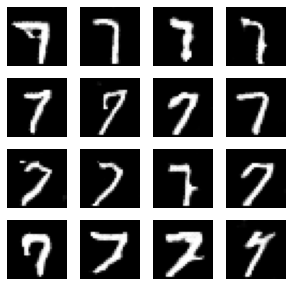

4/4 [==============================] - 0s 4ms/step
6800, [D loss: 0.453309, acc.: 0.45%], [G loss: 1.724174]
1/1 [==============================] - 0s 26ms/step


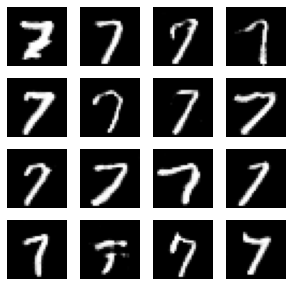

4/4 [==============================] - 0s 5ms/step
6900, [D loss: 0.348080, acc.: 0.35%], [G loss: 1.849763]
1/1 [==============================] - 0s 28ms/step


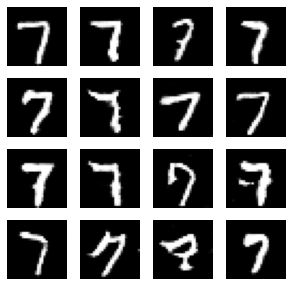

4/4 [==============================] - 0s 5ms/step
7000, [D loss: 0.416717, acc.: 0.42%], [G loss: 2.067937]
1/1 [==============================] - 0s 24ms/step


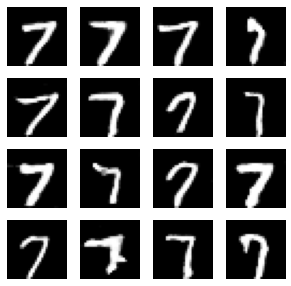

4/4 [==============================] - 0s 3ms/step
7100, [D loss: 0.407651, acc.: 0.41%], [G loss: 2.359499]
1/1 [==============================] - 0s 19ms/step


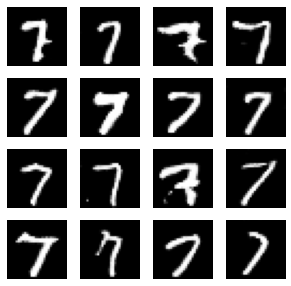

4/4 [==============================] - 0s 4ms/step
7200, [D loss: 0.428218, acc.: 0.43%], [G loss: 1.987192]
1/1 [==============================] - 0s 23ms/step


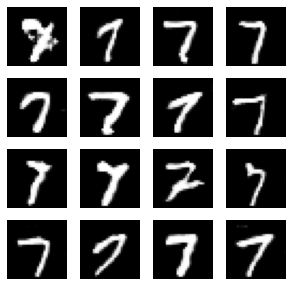

4/4 [==============================] - 0s 5ms/step
7300, [D loss: 0.247242, acc.: 0.25%], [G loss: 2.800766]
1/1 [==============================] - 0s 26ms/step


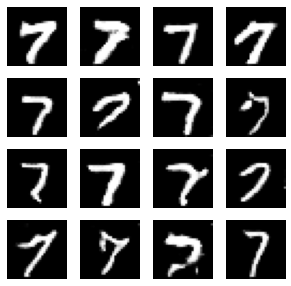

4/4 [==============================] - 0s 4ms/step
7400, [D loss: 0.569592, acc.: 0.57%], [G loss: 2.993272]
1/1 [==============================] - 0s 26ms/step


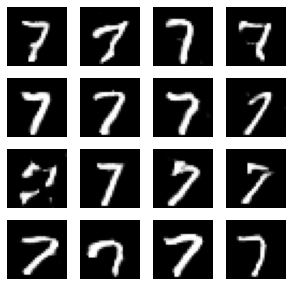

4/4 [==============================] - 0s 3ms/step
7500, [D loss: 0.502197, acc.: 0.50%], [G loss: 2.061373]
1/1 [==============================] - 0s 21ms/step


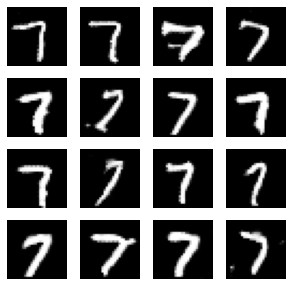

4/4 [==============================] - 0s 3ms/step
7600, [D loss: 0.208241, acc.: 0.21%], [G loss: 2.250436]
1/1 [==============================] - 0s 22ms/step


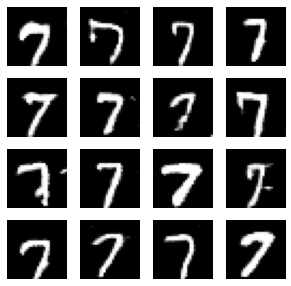

4/4 [==============================] - 0s 3ms/step
7700, [D loss: 0.374162, acc.: 0.37%], [G loss: 2.264927]
1/1 [==============================] - 0s 23ms/step


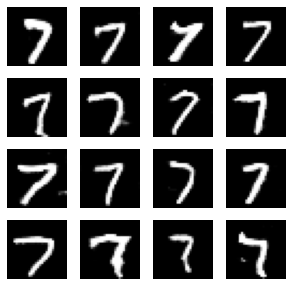

4/4 [==============================] - 0s 4ms/step
7800, [D loss: 0.406164, acc.: 0.41%], [G loss: 2.407288]
1/1 [==============================] - 0s 23ms/step


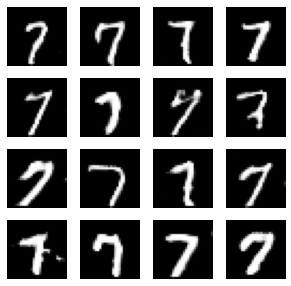

4/4 [==============================] - 0s 5ms/step
7900, [D loss: 0.452235, acc.: 0.45%], [G loss: 2.237871]
1/1 [==============================] - 0s 21ms/step


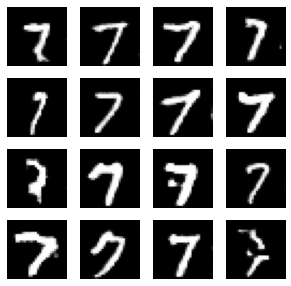

4/4 [==============================] - 0s 5ms/step
8000, [D loss: 0.257912, acc.: 0.26%], [G loss: 2.433765]
1/1 [==============================] - 0s 39ms/step


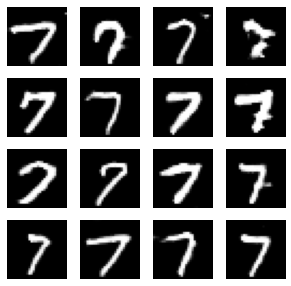

4/4 [==============================] - 0s 8ms/step
8100, [D loss: 0.393375, acc.: 0.39%], [G loss: 1.910738]
1/1 [==============================] - 0s 75ms/step


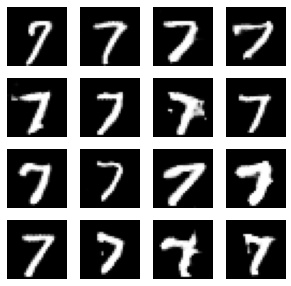

4/4 [==============================] - 0s 4ms/step
8200, [D loss: 0.382804, acc.: 0.38%], [G loss: 1.801371]
1/1 [==============================] - 0s 17ms/step


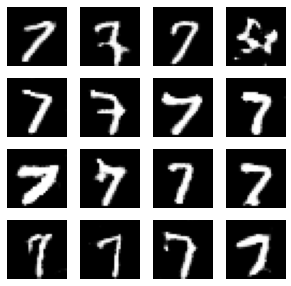

4/4 [==============================] - 0s 5ms/step
8300, [D loss: 0.337675, acc.: 0.34%], [G loss: 2.341187]
1/1 [==============================] - 0s 26ms/step


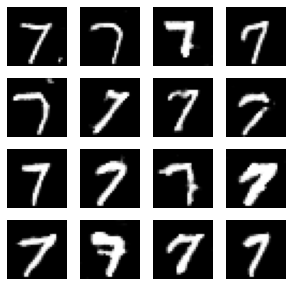

4/4 [==============================] - 0s 5ms/step
8400, [D loss: 0.424322, acc.: 0.42%], [G loss: 2.050430]
1/1 [==============================] - 0s 27ms/step


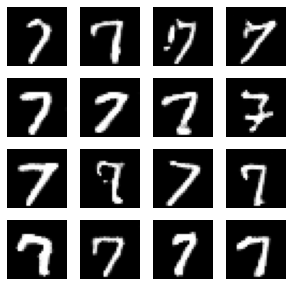

4/4 [==============================] - 0s 4ms/step
8500, [D loss: 0.291351, acc.: 0.29%], [G loss: 2.142390]
1/1 [==============================] - 0s 24ms/step


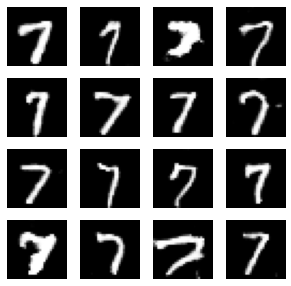

4/4 [==============================] - 0s 4ms/step
8600, [D loss: 0.469903, acc.: 0.47%], [G loss: 2.182534]
1/1 [==============================] - 0s 44ms/step


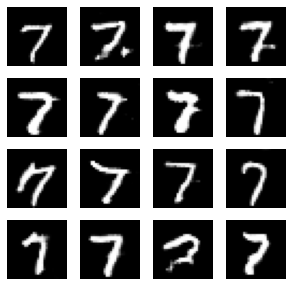

4/4 [==============================] - 0s 4ms/step
8700, [D loss: 0.308499, acc.: 0.31%], [G loss: 1.928436]
1/1 [==============================] - 0s 23ms/step


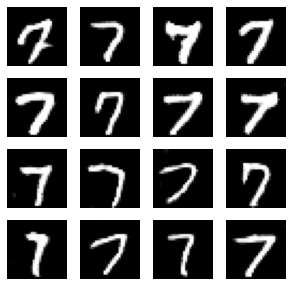

4/4 [==============================] - 0s 4ms/step
8800, [D loss: 0.403169, acc.: 0.40%], [G loss: 2.071542]
1/1 [==============================] - 0s 21ms/step


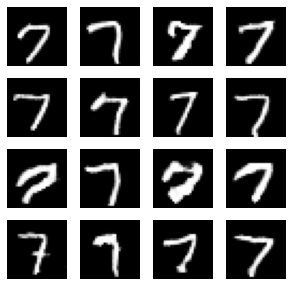

4/4 [==============================] - 0s 6ms/step
8900, [D loss: 0.382214, acc.: 0.38%], [G loss: 1.914046]
1/1 [==============================] - 0s 20ms/step


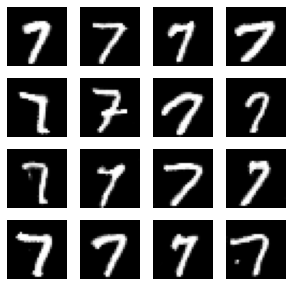

4/4 [==============================] - 0s 5ms/step
9000, [D loss: 0.369345, acc.: 0.37%], [G loss: 2.402301]
1/1 [==============================] - 0s 22ms/step


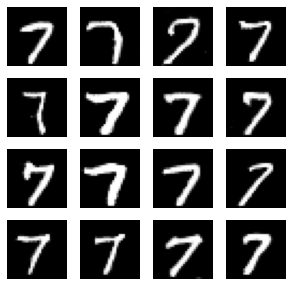

4/4 [==============================] - 0s 5ms/step
9100, [D loss: 0.401333, acc.: 0.40%], [G loss: 2.296833]
1/1 [==============================] - 0s 22ms/step


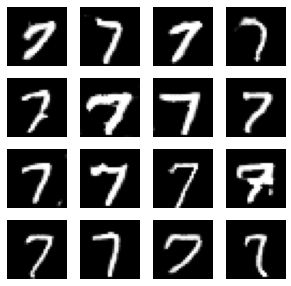

4/4 [==============================] - 0s 4ms/step
9200, [D loss: 0.475648, acc.: 0.48%], [G loss: 2.344093]
1/1 [==============================] - 0s 23ms/step


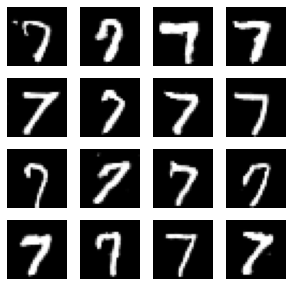

4/4 [==============================] - 0s 4ms/step
9300, [D loss: 0.319372, acc.: 0.32%], [G loss: 2.393609]
1/1 [==============================] - 0s 22ms/step


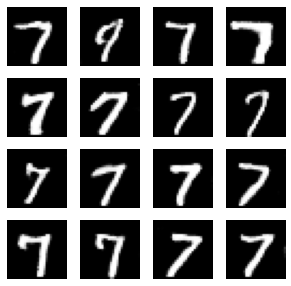

4/4 [==============================] - 0s 4ms/step
9400, [D loss: 0.408668, acc.: 0.41%], [G loss: 2.238505]
1/1 [==============================] - 0s 23ms/step


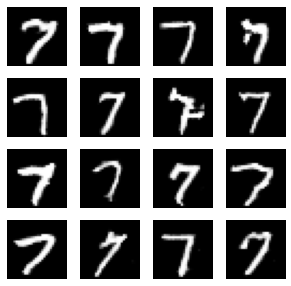

4/4 [==============================] - 0s 4ms/step
9500, [D loss: 0.330955, acc.: 0.33%], [G loss: 2.599479]
1/1 [==============================] - 0s 25ms/step


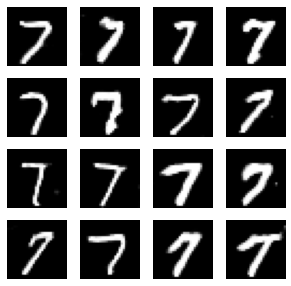

4/4 [==============================] - 0s 5ms/step
9600, [D loss: 0.418383, acc.: 0.42%], [G loss: 1.980384]
1/1 [==============================] - 0s 23ms/step


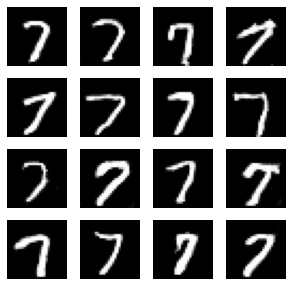

4/4 [==============================] - 0s 3ms/step
9700, [D loss: 0.431581, acc.: 0.43%], [G loss: 1.932861]
1/1 [==============================] - 0s 33ms/step


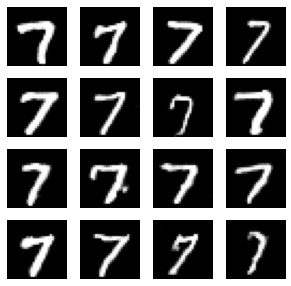

4/4 [==============================] - 0s 4ms/step
9800, [D loss: 0.366599, acc.: 0.37%], [G loss: 2.000671]
1/1 [==============================] - 0s 24ms/step


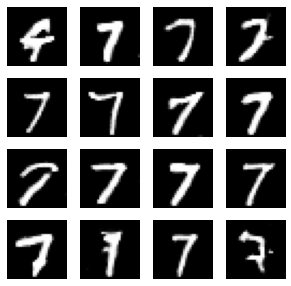

4/4 [==============================] - 0s 4ms/step
9900, [D loss: 0.481249, acc.: 0.48%], [G loss: 1.778286]
1/1 [==============================] - 0s 27ms/step


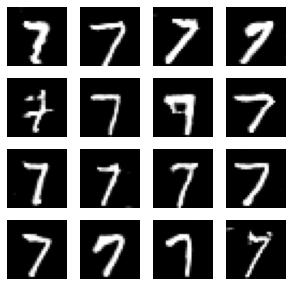

4/4 [==============================] - 0s 4ms/step
10000, [D loss: 0.367373, acc.: 0.37%], [G loss: 1.982105]
1/1 [==============================] - 0s 21ms/step


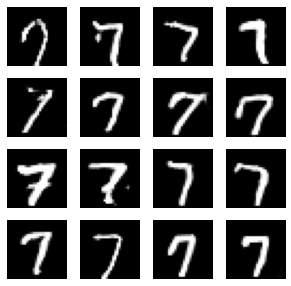

4/4 [==============================] - 0s 4ms/step
10100, [D loss: 0.460235, acc.: 0.46%], [G loss: 2.025793]
1/1 [==============================] - 0s 22ms/step


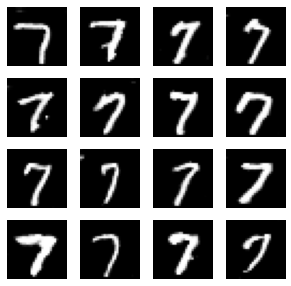

4/4 [==============================] - 0s 4ms/step
10200, [D loss: 0.396634, acc.: 0.40%], [G loss: 1.823937]
1/1 [==============================] - 0s 26ms/step


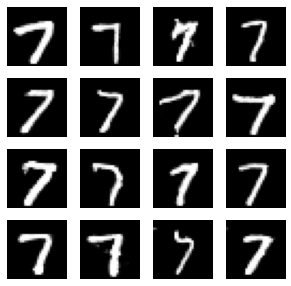

4/4 [==============================] - 0s 3ms/step
10300, [D loss: 0.400047, acc.: 0.40%], [G loss: 1.962587]
1/1 [==============================] - 0s 23ms/step


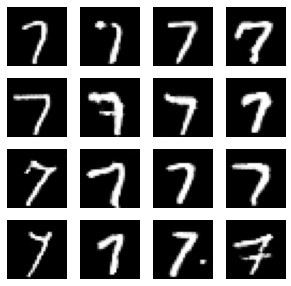

4/4 [==============================] - 0s 5ms/step
10400, [D loss: 0.333766, acc.: 0.33%], [G loss: 2.130947]
1/1 [==============================] - 0s 15ms/step


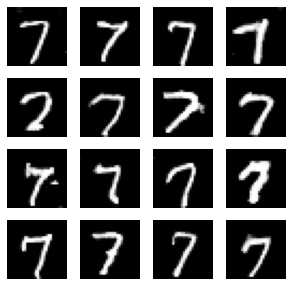

4/4 [==============================] - 0s 5ms/step
10500, [D loss: 0.342257, acc.: 0.34%], [G loss: 1.943097]
1/1 [==============================] - 0s 43ms/step


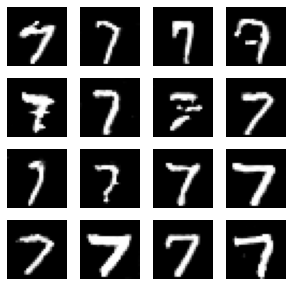

4/4 [==============================] - 0s 3ms/step
10600, [D loss: 0.405290, acc.: 0.41%], [G loss: 2.238213]
1/1 [==============================] - 0s 25ms/step


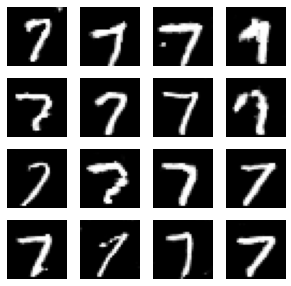

4/4 [==============================] - 0s 4ms/step
10700, [D loss: 0.341607, acc.: 0.34%], [G loss: 2.126513]
1/1 [==============================] - 0s 23ms/step


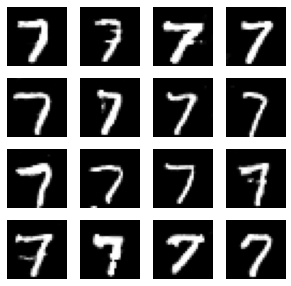

4/4 [==============================] - 0s 4ms/step
10800, [D loss: 0.318530, acc.: 0.32%], [G loss: 2.132832]
1/1 [==============================] - 0s 27ms/step


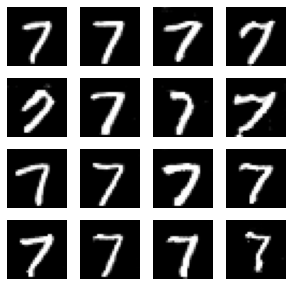

4/4 [==============================] - 0s 3ms/step
10900, [D loss: 0.271456, acc.: 0.27%], [G loss: 2.136720]
1/1 [==============================] - 0s 27ms/step


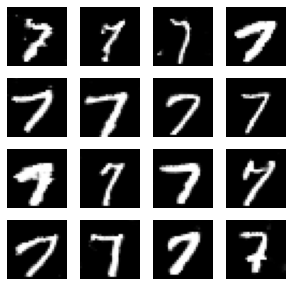

4/4 [==============================] - 0s 4ms/step
11000, [D loss: 0.361892, acc.: 0.36%], [G loss: 2.326324]
1/1 [==============================] - 0s 15ms/step


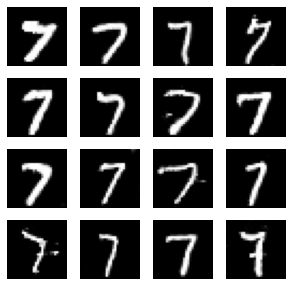

4/4 [==============================] - 0s 4ms/step
11100, [D loss: 0.391486, acc.: 0.39%], [G loss: 2.184725]
1/1 [==============================] - 0s 21ms/step


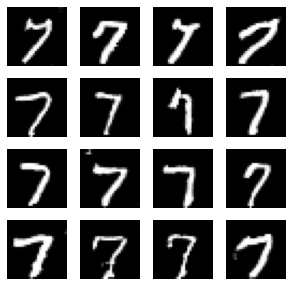

4/4 [==============================] - 0s 4ms/step
11200, [D loss: 0.409988, acc.: 0.41%], [G loss: 2.318362]
1/1 [==============================] - 0s 20ms/step


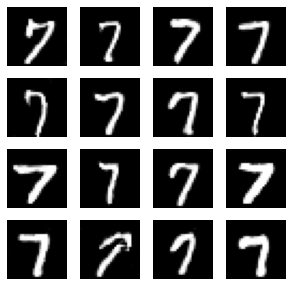

4/4 [==============================] - 0s 4ms/step
11300, [D loss: 0.486506, acc.: 0.49%], [G loss: 2.102204]
1/1 [==============================] - 0s 21ms/step


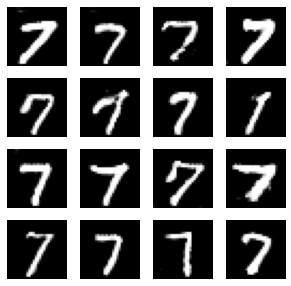

4/4 [==============================] - 0s 4ms/step
11400, [D loss: 0.215224, acc.: 0.22%], [G loss: 3.004977]
1/1 [==============================] - 0s 22ms/step


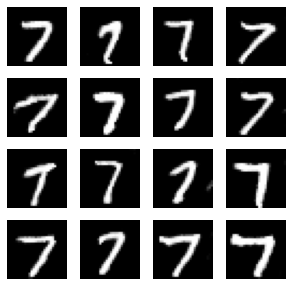

4/4 [==============================] - 0s 4ms/step
11500, [D loss: 0.296758, acc.: 0.30%], [G loss: 2.629481]
1/1 [==============================] - 0s 23ms/step


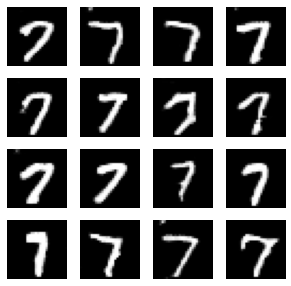

4/4 [==============================] - 0s 4ms/step
11600, [D loss: 0.371175, acc.: 0.37%], [G loss: 2.922132]
1/1 [==============================] - 0s 24ms/step


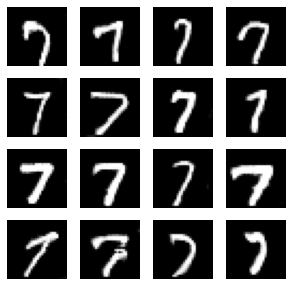

4/4 [==============================] - 0s 4ms/step
11700, [D loss: 0.484813, acc.: 0.48%], [G loss: 1.789868]
1/1 [==============================] - 0s 22ms/step


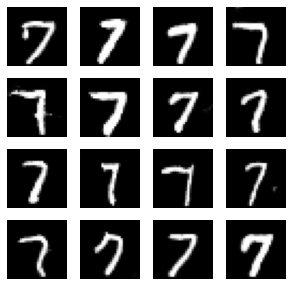

4/4 [==============================] - 0s 4ms/step
11800, [D loss: 0.294297, acc.: 0.29%], [G loss: 2.493794]
1/1 [==============================] - 0s 38ms/step


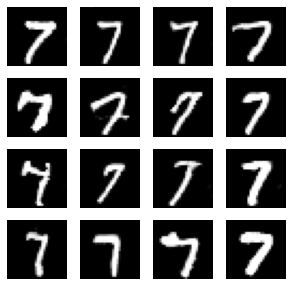

4/4 [==============================] - 0s 4ms/step
11900, [D loss: 0.252025, acc.: 0.25%], [G loss: 2.466618]
1/1 [==============================] - 0s 23ms/step


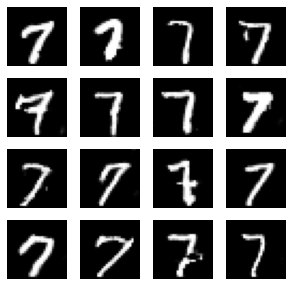

4/4 [==============================] - 0s 3ms/step
12000, [D loss: 0.249110, acc.: 0.25%], [G loss: 3.151933]
1/1 [==============================] - 0s 21ms/step


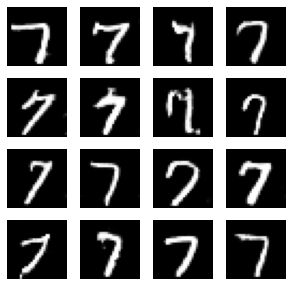

4/4 [==============================] - 0s 4ms/step
12100, [D loss: 0.324587, acc.: 0.32%], [G loss: 2.474933]
1/1 [==============================] - 0s 22ms/step


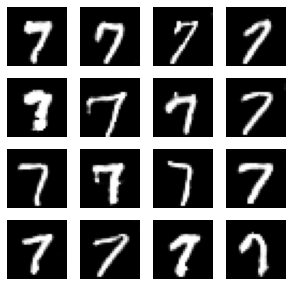

4/4 [==============================] - 0s 4ms/step
12200, [D loss: 0.336007, acc.: 0.34%], [G loss: 2.209349]
1/1 [==============================] - 0s 22ms/step


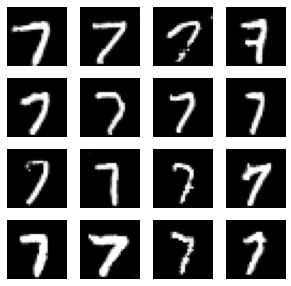

4/4 [==============================] - 0s 4ms/step
12300, [D loss: 0.325505, acc.: 0.33%], [G loss: 2.654958]
1/1 [==============================] - 0s 23ms/step


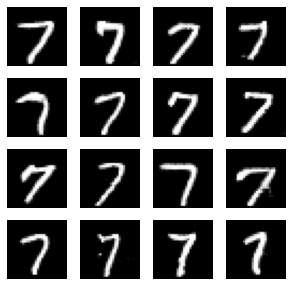

4/4 [==============================] - 0s 4ms/step
12400, [D loss: 0.330576, acc.: 0.33%], [G loss: 2.238303]
1/1 [==============================] - 0s 22ms/step


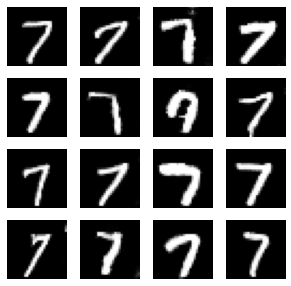

4/4 [==============================] - 0s 5ms/step
12500, [D loss: 0.357103, acc.: 0.36%], [G loss: 2.122669]
1/1 [==============================] - 0s 22ms/step


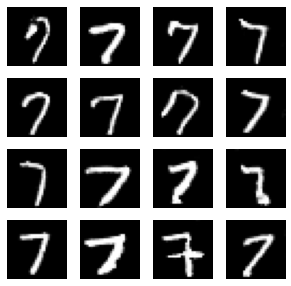

4/4 [==============================] - 0s 4ms/step
12600, [D loss: 0.317091, acc.: 0.32%], [G loss: 2.917008]
1/1 [==============================] - 0s 33ms/step


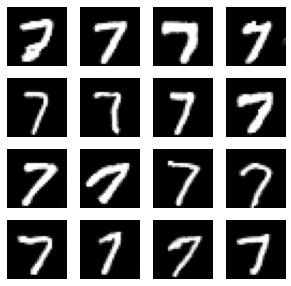

4/4 [==============================] - 0s 5ms/step
12700, [D loss: 0.283516, acc.: 0.28%], [G loss: 2.414339]
1/1 [==============================] - 0s 24ms/step


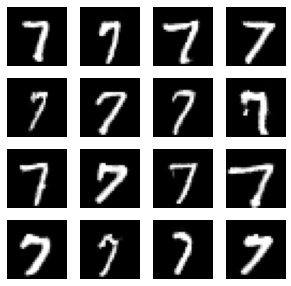

4/4 [==============================] - 0s 4ms/step
12800, [D loss: 0.279721, acc.: 0.28%], [G loss: 2.424464]
1/1 [==============================] - 0s 40ms/step


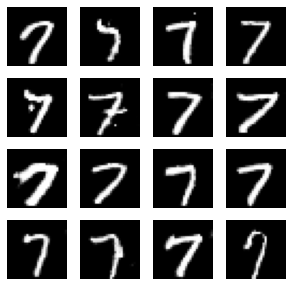

4/4 [==============================] - 0s 5ms/step
12900, [D loss: 0.281599, acc.: 0.28%], [G loss: 3.008390]
1/1 [==============================] - 0s 21ms/step


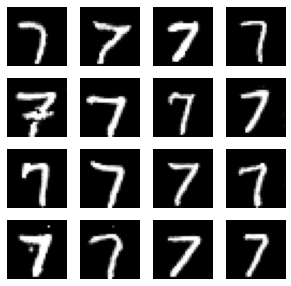

4/4 [==============================] - 0s 4ms/step
13000, [D loss: 0.410566, acc.: 0.41%], [G loss: 2.433221]
1/1 [==============================] - 0s 30ms/step


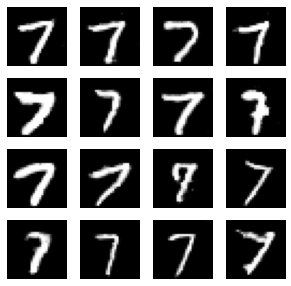

4/4 [==============================] - 0s 3ms/step
13100, [D loss: 0.362480, acc.: 0.36%], [G loss: 2.630484]
1/1 [==============================] - 0s 22ms/step


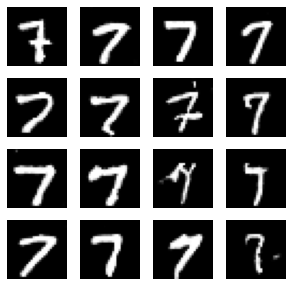

4/4 [==============================] - 0s 4ms/step
13200, [D loss: 0.495694, acc.: 0.50%], [G loss: 1.791268]
1/1 [==============================] - 0s 22ms/step


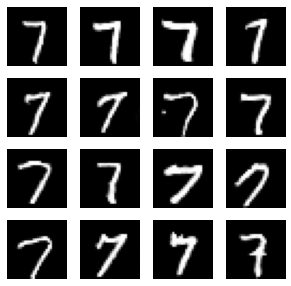

4/4 [==============================] - 0s 4ms/step
13300, [D loss: 0.356291, acc.: 0.36%], [G loss: 2.532509]
1/1 [==============================] - 0s 23ms/step


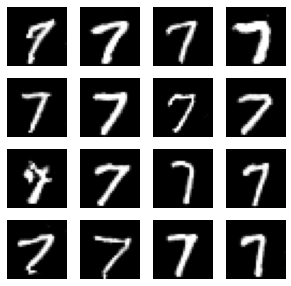

4/4 [==============================] - 0s 4ms/step
13400, [D loss: 0.324931, acc.: 0.32%], [G loss: 2.204664]
1/1 [==============================] - 0s 23ms/step


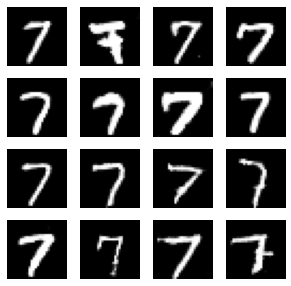

4/4 [==============================] - 0s 5ms/step
13500, [D loss: 0.354366, acc.: 0.35%], [G loss: 2.065041]
1/1 [==============================] - 0s 25ms/step


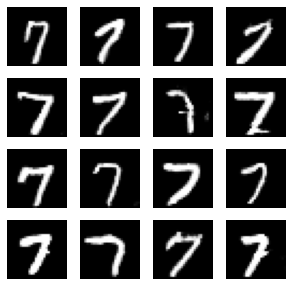

4/4 [==============================] - 0s 4ms/step
13600, [D loss: 0.340548, acc.: 0.34%], [G loss: 2.357597]
1/1 [==============================] - 0s 23ms/step


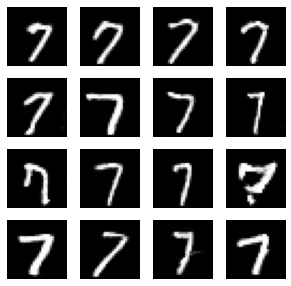

4/4 [==============================] - 0s 5ms/step
13700, [D loss: 0.379971, acc.: 0.38%], [G loss: 2.264179]
1/1 [==============================] - 0s 19ms/step


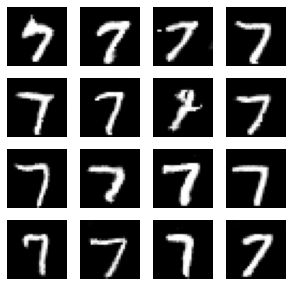

4/4 [==============================] - 0s 4ms/step
13800, [D loss: 0.340073, acc.: 0.34%], [G loss: 2.541689]
1/1 [==============================] - 0s 25ms/step


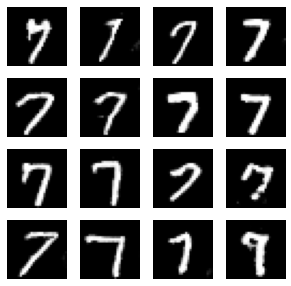

4/4 [==============================] - 0s 4ms/step
13900, [D loss: 0.332833, acc.: 0.33%], [G loss: 2.251931]
1/1 [==============================] - 0s 22ms/step


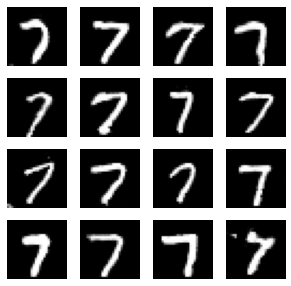

4/4 [==============================] - 0s 5ms/step
14000, [D loss: 0.407276, acc.: 0.41%], [G loss: 1.991238]
1/1 [==============================] - 0s 24ms/step


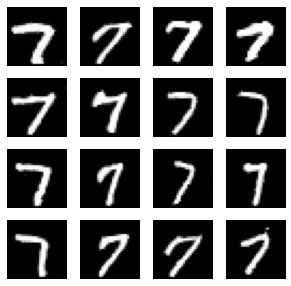

4/4 [==============================] - 0s 3ms/step
14100, [D loss: 0.304037, acc.: 0.30%], [G loss: 2.358829]
1/1 [==============================] - 0s 36ms/step


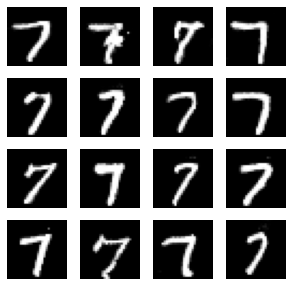

4/4 [==============================] - 0s 4ms/step
14200, [D loss: 0.363710, acc.: 0.36%], [G loss: 2.466326]
1/1 [==============================] - 0s 22ms/step


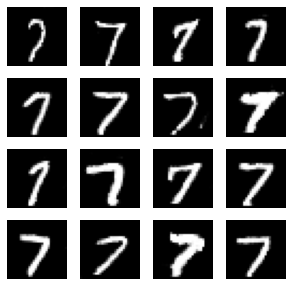

4/4 [==============================] - 0s 4ms/step
14300, [D loss: 0.300257, acc.: 0.30%], [G loss: 2.445523]
1/1 [==============================] - 0s 26ms/step


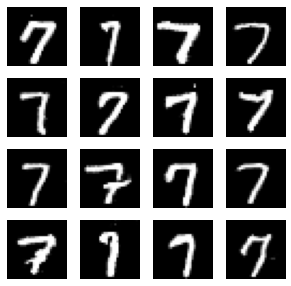

4/4 [==============================] - 0s 4ms/step
14400, [D loss: 0.331793, acc.: 0.33%], [G loss: 2.341050]
1/1 [==============================] - 0s 25ms/step


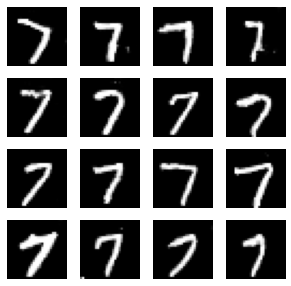

4/4 [==============================] - 0s 4ms/step
14500, [D loss: 0.294741, acc.: 0.29%], [G loss: 2.477197]
1/1 [==============================] - 0s 22ms/step


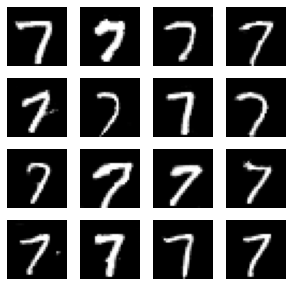

4/4 [==============================] - 0s 4ms/step
14600, [D loss: 0.267018, acc.: 0.27%], [G loss: 3.369195]
1/1 [==============================] - 0s 23ms/step


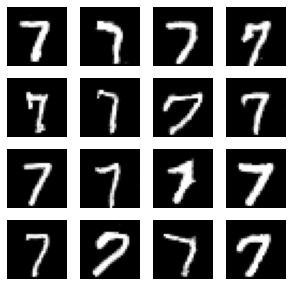

4/4 [==============================] - 0s 5ms/step
14700, [D loss: 0.326782, acc.: 0.33%], [G loss: 2.532696]
1/1 [==============================] - 0s 26ms/step


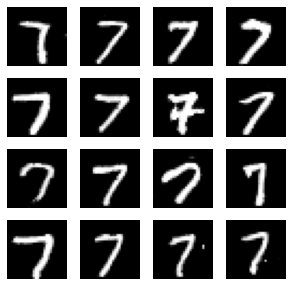

4/4 [==============================] - 0s 4ms/step
14800, [D loss: 0.259920, acc.: 0.26%], [G loss: 2.491166]
1/1 [==============================] - 0s 27ms/step


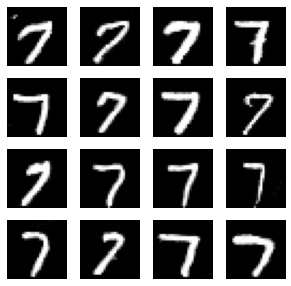

4/4 [==============================] - 0s 3ms/step
14900, [D loss: 0.318891, acc.: 0.32%], [G loss: 2.259812]
1/1 [==============================] - 0s 22ms/step


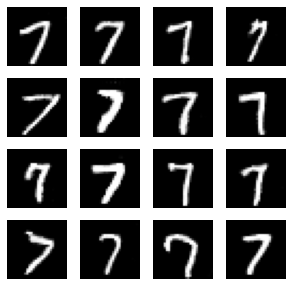

4/4 [==============================] - 0s 5ms/step
15000, [D loss: 0.272477, acc.: 0.27%], [G loss: 2.784627]
1/1 [==============================] - 0s 21ms/step


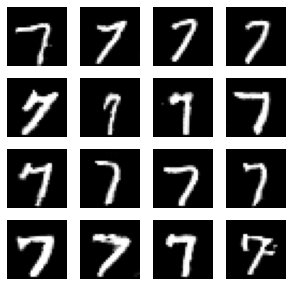

4/4 [==============================] - 0s 4ms/step
15100, [D loss: 0.332145, acc.: 0.33%], [G loss: 2.895452]
1/1 [==============================] - 0s 24ms/step


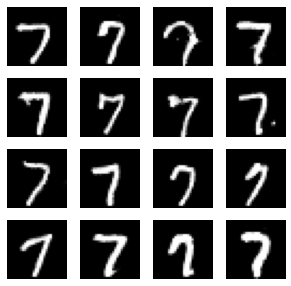

4/4 [==============================] - 0s 6ms/step
15200, [D loss: 0.348758, acc.: 0.35%], [G loss: 2.359959]
1/1 [==============================] - 0s 22ms/step


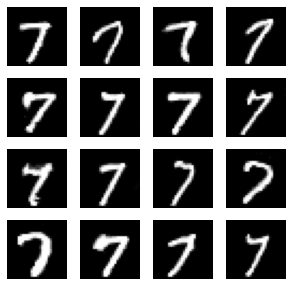

4/4 [==============================] - 0s 5ms/step
15300, [D loss: 0.327543, acc.: 0.33%], [G loss: 2.021793]
1/1 [==============================] - 0s 24ms/step


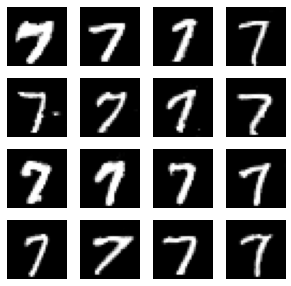

4/4 [==============================] - 0s 4ms/step
15400, [D loss: 0.230306, acc.: 0.23%], [G loss: 2.601962]
1/1 [==============================] - 0s 22ms/step


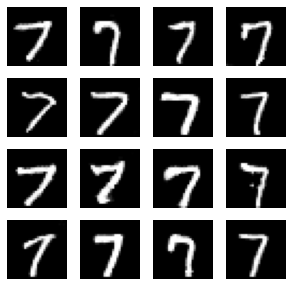

4/4 [==============================] - 0s 4ms/step
15500, [D loss: 0.356011, acc.: 0.36%], [G loss: 2.886217]
1/1 [==============================] - 0s 24ms/step


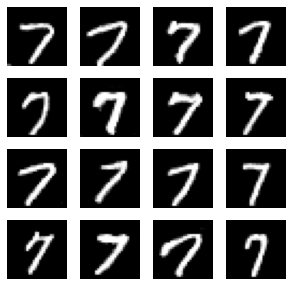

4/4 [==============================] - 0s 4ms/step
15600, [D loss: 0.287750, acc.: 0.29%], [G loss: 2.487153]
1/1 [==============================] - 0s 21ms/step


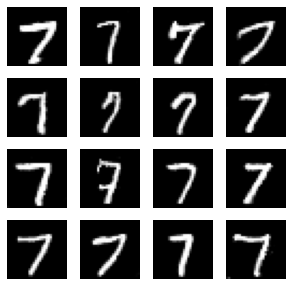

4/4 [==============================] - 0s 4ms/step
15700, [D loss: 0.224985, acc.: 0.22%], [G loss: 2.621669]
1/1 [==============================] - 0s 29ms/step


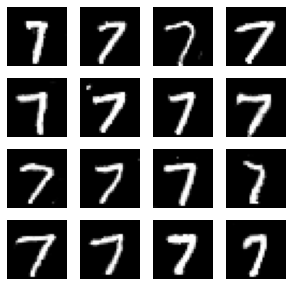

4/4 [==============================] - 0s 4ms/step
15800, [D loss: 0.308301, acc.: 0.31%], [G loss: 2.907144]
1/1 [==============================] - 0s 21ms/step


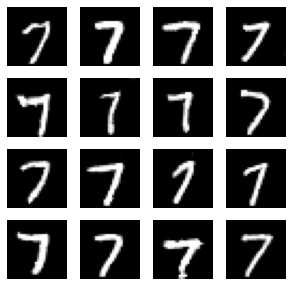

4/4 [==============================] - 0s 3ms/step
15900, [D loss: 0.343387, acc.: 0.34%], [G loss: 2.615382]
1/1 [==============================] - 0s 21ms/step


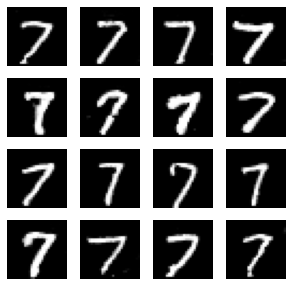

4/4 [==============================] - 0s 4ms/step
16000, [D loss: 0.287442, acc.: 0.29%], [G loss: 2.843488]
1/1 [==============================] - 0s 35ms/step


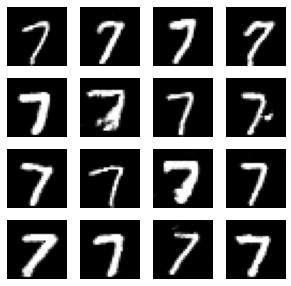

4/4 [==============================] - 0s 5ms/step
16100, [D loss: 0.268304, acc.: 0.27%], [G loss: 2.749002]
1/1 [==============================] - 0s 21ms/step


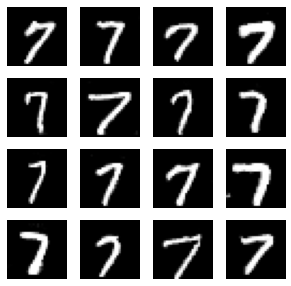

4/4 [==============================] - 0s 4ms/step
16200, [D loss: 0.320283, acc.: 0.32%], [G loss: 2.380841]
1/1 [==============================] - 0s 22ms/step


KeyboardInterrupt: ignored

In [ ]:
for epoch in range(epochs):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs = x_train[idx]

    z = np.random.normal(0, 1, (batch_size, noise))
    fake_imgs = generator.predict(z)

    d_hist_real = discriminator.train_on_batch(real_imgs, real)
    d_hist_fake = discriminator.train_on_batch(fake_imgs, fake)

    d_loss, d_acc = np.add(d_hist_fake, d_hist_real) * 0.5



    if epoch % 2 == 0:
        z = np.random.normal(0, 1, (batch_size, noise))
        gan_hist = gan_model.train_on_batch(z, real)

    if epoch % sample_interval == 0:
        print('%d, [D loss: %f, acc.: %.2f%%], [G loss: %f]'%(
              epoch, d_loss, d_loss, gan_hist)) # %d -> 
        row = col = 4
        z = np.random.normal(0, 1, (row * col, noise))
        fake_imgs = generator.predict(z)
        fake_imgs = 0.5 * fake_imgs + 0.5
        _, axs = plt.subplots(row, col, figsize=(5, 5), sharey=True, sharex=True)
        cont = 0
        for i in range(row):
            for j in range(col):
                axs[i, j].imshow(fake_imgs[cont, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cont += 1
        path = os.path.join(OUT_DIR, 'img-{}'.format(epoch+1))
        plt.show()
        plt.close()
        generator.save('/content/drive/MyDrive/Colab Notebooks/GAN_models/generator_mnist_{}.h5'.format(MY_NUMBER))


In [12]:
number_GAN_models = []
for i in range(10):
    number_GAN_models.append(load_model(
        '/content/drive/MyDrive/Colab Notebooks/GAN_models/generator_mnist_{}.h5'.format(i)))
    

In [29]:
four_digit_number = '5687'  # 간모델에는 없는 손글씨 느낌의 새로운 이미지를 만들어냄

In [30]:
imgs = []
for i in four_digit_number:
    i = int(i)
    z = np.random.normal(0, 1,(1, 100))
    fake_img = number_GAN_models[i].predict(z)
    fake_img = 0.5 * fake_img + 0.5
    print(fake_img.shape)
    imgs.append(fake_img.reshape(28, 28))


1/1 [==============================] - 0s 114ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 97ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 97ms/step
(1, 28, 28, 1)


1/1 [==============================] - 0s 102ms/step
(1, 28, 28, 1)


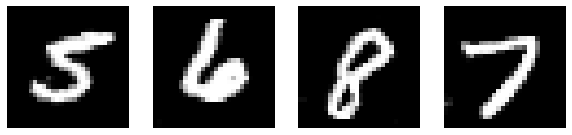

In [31]:
_, axs = plt.subplots(1, 4, figsize=(10, 40), sharex = True, sharey = True)
for i in range(4):
    axs[i].imshow(imgs[i], cmap='gray')
    axs[i].axis('off')
plt.show()

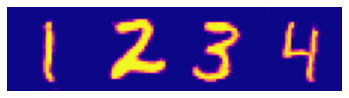

In [38]:
img = imgs[0]
for i in range(1, 4):
    img = np.append(img, imgs[i], axis=1)
plt.plasma()    # matplotlib에 있는 컬러 사용
plt.imshow(img)
plt.axis('off')
plt.show()

516234
1/1 [==============================] - 0s 20ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 15ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 16ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 13ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 15ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 15ms/step
(1, 28, 28, 1)


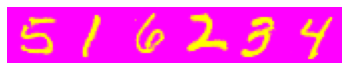

In [39]:
input_value = input()
imgs = []
for i in input_value:
    i = int(i)
    z = np.random.normal(0, 1,(1, 100))
    fake_img = number_GAN_models[i].predict(z)
    fake_img = 0.5 * fake_img + 0.5
    print(fake_img.shape)
    imgs.append(fake_img.reshape(28, 28))
img = imgs[0]
for i in range(1, len(input_value)):
    img = np.append(img, imgs[i], axis=1)
plt.spring()    # matplotlib에 있는 컬러 사용
plt.imshow(img)
plt.axis('off')
plt.show()